# Import required funtionality for this chapter

In [1]:
import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt


## Code for opening the Boston housing file and viewing the first 9 records

In [2]:
housing_df = pd.read_csv('BostonHousing.csv')

In [3]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [4]:
housing_df .describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [5]:
housing_df = housing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'}) #rename CAT. MEDV for easier data handlin1
housing_df.head(9)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT_MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


## Load, convert Amtrak data for time series analysis

In [6]:
Amtrak_df = pd.read_csv('Amtrak.csv')
Amtrak_df.head(9)
print(Amtrak_df)

          Month  Ridership
0    01/01/1991   1708.917
1    01/02/1991   1620.586
2    01/03/1991   1972.715
3    01/04/1991   1811.665
4    01/05/1991   1974.964
..          ...        ...
154  01/11/2003   2076.054
155  01/12/2003   2140.677
156  01/01/2004   1831.508
157  01/02/2004   1838.006
158  01/03/2004   2132.446

[159 rows x 2 columns]


In [7]:
##Create column 'Date' that is a date data type
Amtrak_df['Date'] = pd.to_datetime(Amtrak_df.Month, format='%d/%m/%Y')
Amtrak_df.head(9)


,Month,Ridership,Date
0,01/01/1991,1708.917,1991-01-01
1,01/02/1991,1620.586,1991-02-01
2,01/03/1991,1972.715,1991-03-01
3,01/04/1991,1811.665,1991-04-01
4,01/05/1991,1974.964,1991-05-01
5,01/06/1991,1862.356,1991-06-01
6,01/07/1991,1939.860,1991-07-01
7,01/08/1991,2013.264,1991-08-01
8,01/09/1991,1595.657,1991-09-01


In [8]:
## Create a 'ridership_ts' tablesheet that has Date and Ridership columns
ridership_ts = pd.Series(Amtrak_df.Ridership.values, index=Amtrak_df.Date)
print(ridership_ts.head(9))


Date
1991-01-01    1708.917
1991-02-01    1620.586
1991-03-01    1972.715
1991-04-01    1811.665
1991-05-01    1974.964
1991-06-01    1862.356
1991-07-01    1939.860
1991-08-01    2013.264
1991-09-01    1595.657
dtype: float64


In [9]:
print(ridership_ts.shape)

(159,)


## line graph

Text(0, 0.5, 'Ridership (in 000s)')

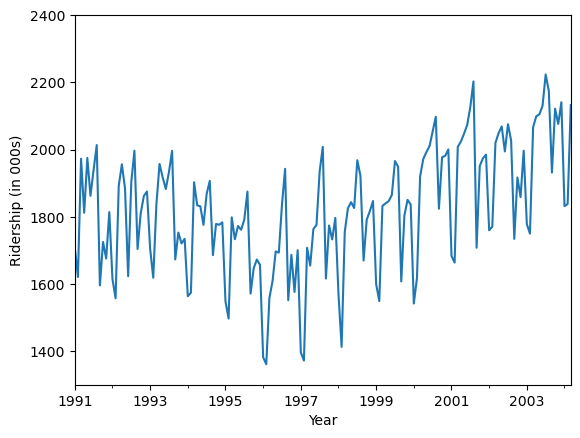

In [10]:
# Pandas Version
ridership_ts.plot(ylim=[1300, 2400], legend=False)
plt.xlabel('Year'); plt.ylabel('Ridership (in 000s)')


Text(0, 0.5, 'Ridership (in 000s)')

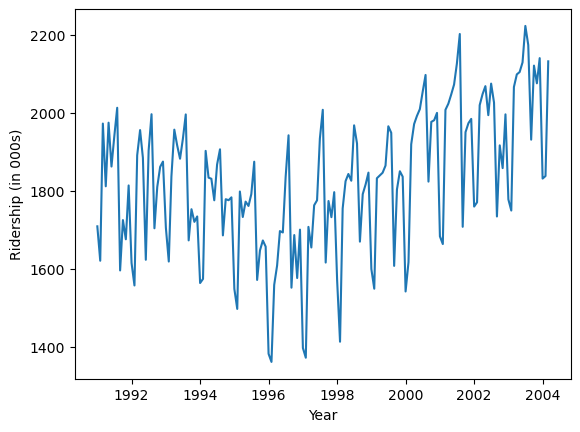

In [11]:
# matplotlib Version
plt.plot(ridership_ts.index, ridership_ts)
plt.xlabel('Year'); plt.ylabel('Ridership (in 000s)')


## scatter plot with axes names

<Axes: xlabel='LSTAT', ylabel='MEDV'>

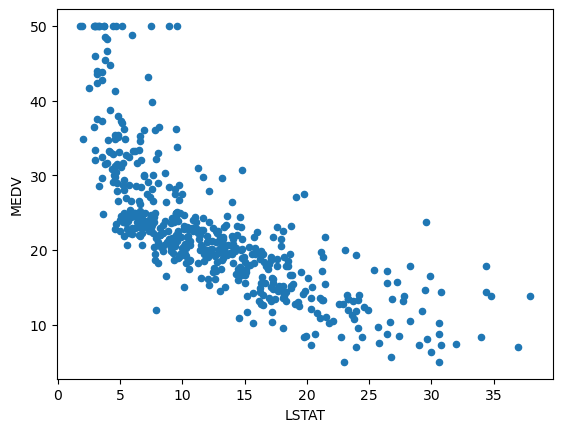

In [12]:
# Pandas Version
housing_df.plot.scatter(x='LSTAT', y='MEDV', legend=False)

Text(0, 0.5, 'MEDV')

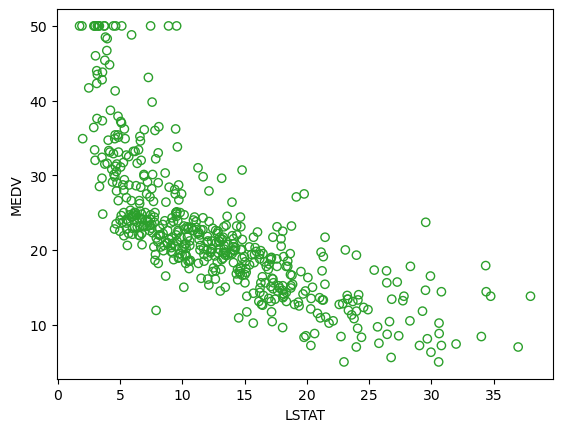

In [13]:
# matplotlib Version
# Set the color of the points in the scatterplot and draw as open circles
plt.scatter(housing_df.LSTAT, housing_df.MEDV, color='C2', facecolor='none')
plt.xlabel('LSTAT'); plt.ylabel('MEDV')


## barchart of CHAS vs. mean MEDV

(2,)
CHAS
0    22.093843
1    28.440000
Name: MEDV, dtype: float64


Text(0, 0.5, 'Avg. MEDV')

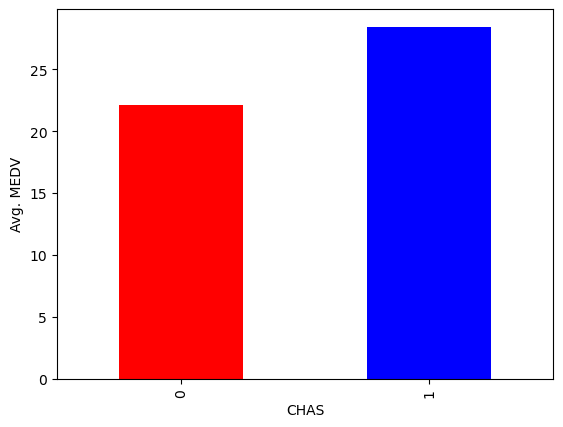

In [14]:
# Pandas Version
# compute mean MEDV per CHAR= (0, 1)
ax= housing_df.groupby('CHAS').mean().MEDV
print(ax.shape)
print(ax)
ax.plot(kind='bar', color=['Red', 'Blue'])
plt.ylabel('Avg. MEDV')
#fig.set_ylabeL('Avg. MEDV')


Text(0, 0.5, 'Avg. MEDV')

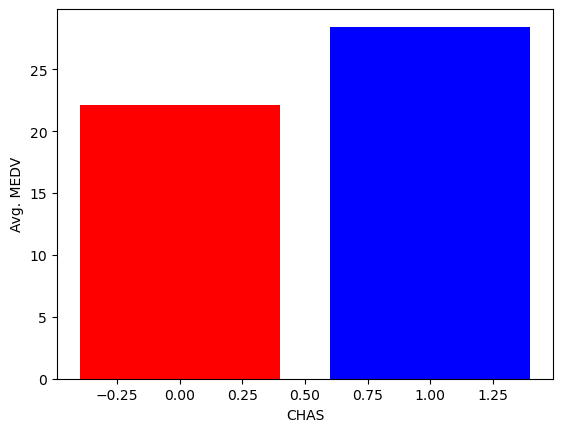

In [15]:
# matplotlib Version
# compute mean MEDV per CHAR= (0, 1)
dataForPlot = housing_df.groupby('CHAS').mean().MEDV
fig, ax= plt.subplots()
ax.bar(dataForPlot.index, dataForPlot, color=['Red', 'Blue'])
#ax.set_xticks([0, 1}, False)
ax.set_xlabel('CHAS')
ax.set_ylabel('Avg. MEDV')


## barchart of CHAS vs. CAT MEDV

Text(0, 0.5, '% of CAT.MEDV')

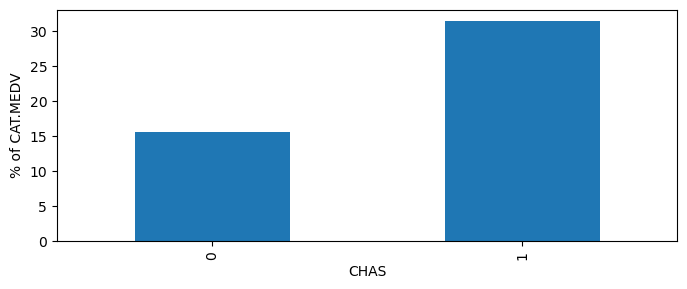

In [16]:
# Pandas Version
dataForPlot = housing_df.groupby('CHAS').mean()['CAT_MEDV'] * 100
ax= dataForPlot.plot(kind ='bar', figsize=[8, 3])
ax.set_ylabel('% of CAT.MEDV')


# Distribution Plot

## histogram of MEDV

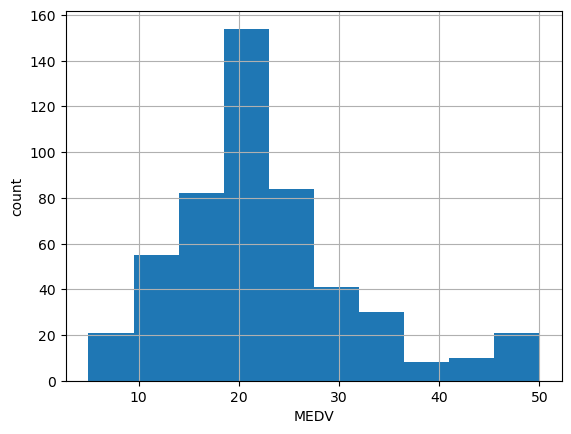

In [17]:
# Pandas Version
ax= housing_df.MEDV.hist()
ax.set_xlabel('MEDV'); ax.set_ylabel('count');


Text(0.5, 1.0, '')

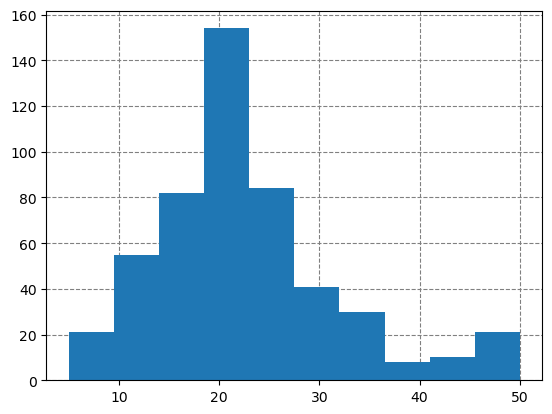

In [18]:
# matplotlib Version
fig, ax= plt.subplots()
ax.hist(housing_df.MEDV)
ax.set_axisbelow(True) #Show the grid Lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
plt.suptitle('')#Suppress the titles
plt. title('')


## boxplot

Text(0.5, 1.0, '')

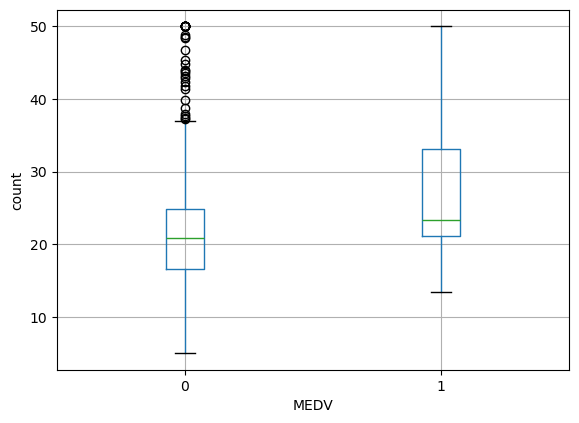

In [19]:
# Pandas Version
# boxplot of MEDV for different values of CHAS
ax= housing_df.boxplot(column='MEDV', by='CHAS')
ax.set_xlabel('MEDV'); ax.set_ylabel('count')
plt.suptitle('')#Suppress the titles
plt.title('')


## side-by-side boxplots

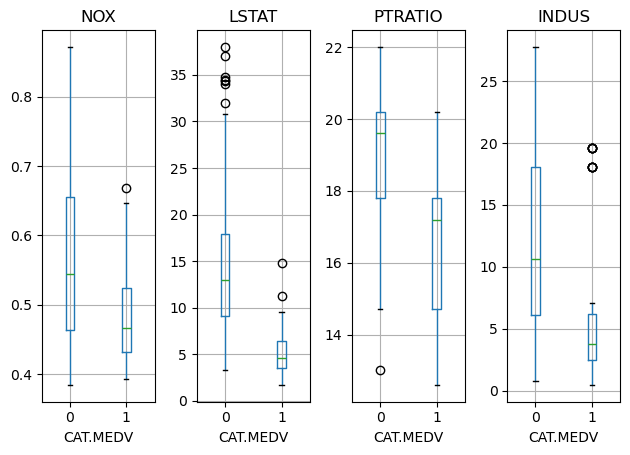

In [20]:
fig, axes= plt.subplots(nrows = 1, ncols = 4)
housing_df.boxplot(column='NOX', by='CAT_MEDV', ax=axes[0])
housing_df.boxplot(column='LSTAT', by='CAT_MEDV', ax=axes[1])
housing_df.boxplot(column='PTRATIO', by='CAT_MEDV', ax=axes[2])
housing_df.boxplot(column='INDUS', by='CAT_MEDV', ax=axes[3])
for ax in axes:
    ax.set_xlabel('CAT.MEDV')
plt.suptitle('')#Suppress the overall title
plt.tight_layout() #Increase the separation between the plots
    

## Heatmaps

In [21]:
# Using seaborn
import seaborn as sns
# Simple heatmap of correlations (without values)
corr= housing_df.corr()
print(corr.shape)


(14, 14)


<Axes: >

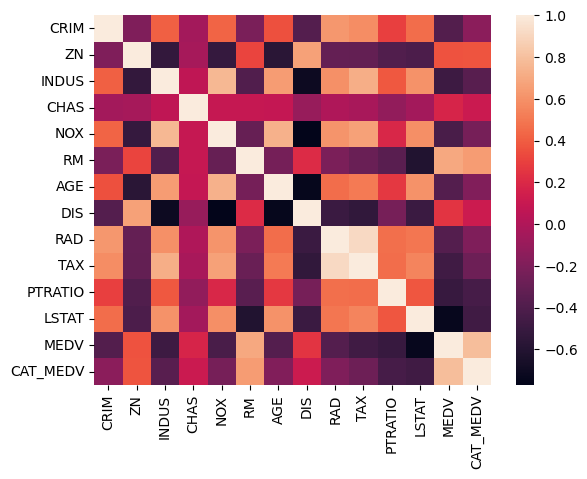

In [22]:
#Change the color to a diveragent scale and fix the range of the colormap
sns.heatmap(corr)


<Axes: >

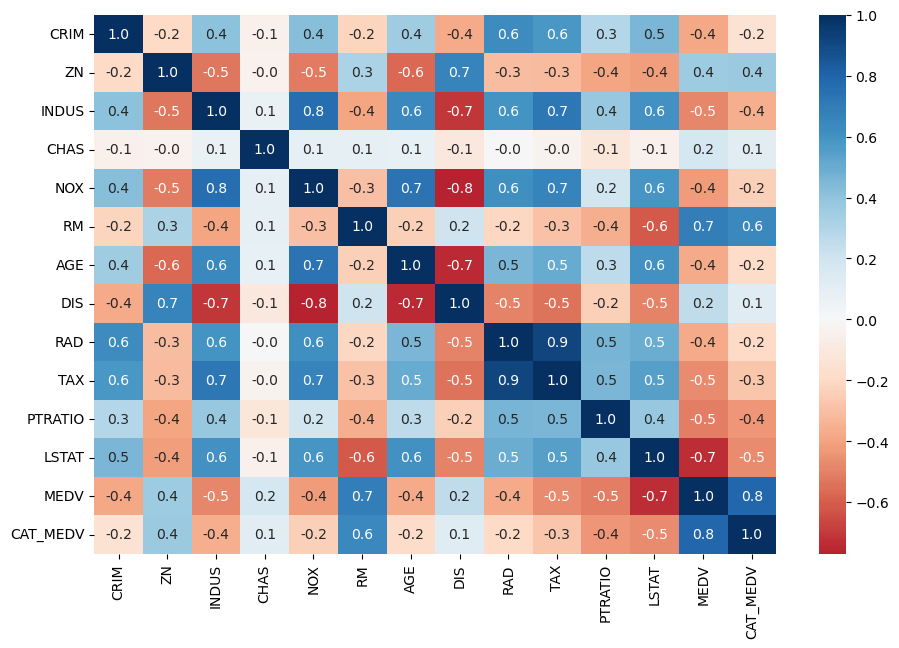

In [23]:
# Include information about values (example demonstrates how to control the size of the plot)
fig, ax= plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

<Axes: >

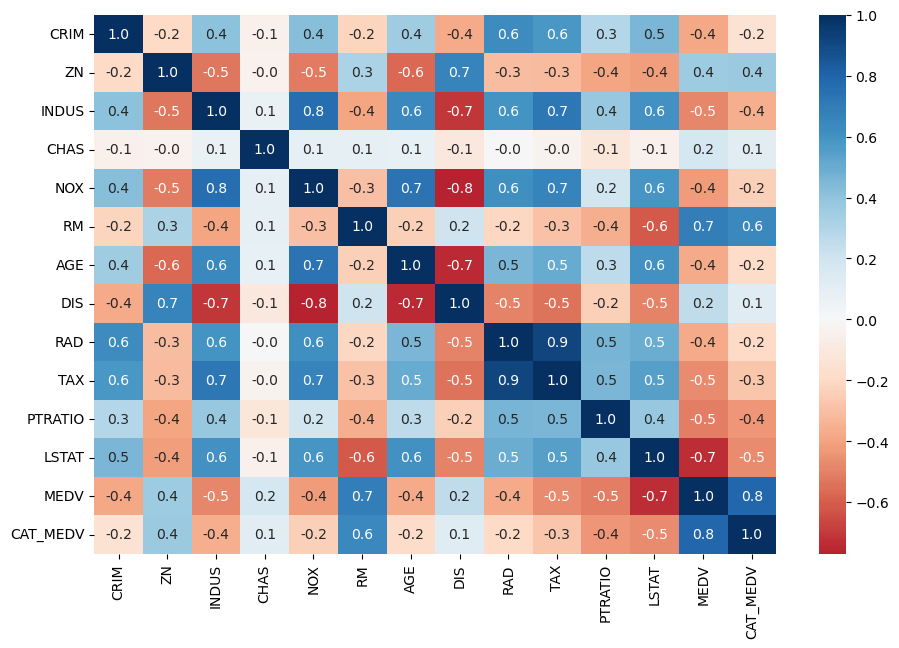

In [24]:
# Include information about values (example demonstrates how to control the size of the plot)
fig,ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

<Axes: >

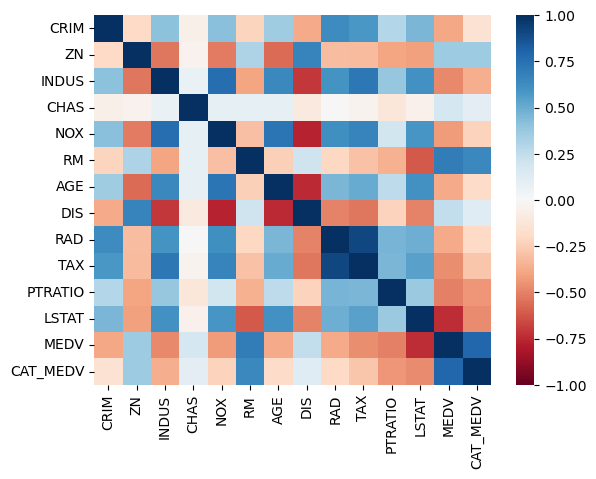

In [25]:
# Change to divergent scale and fix the range

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")

## Multidimensional Visualization

<Axes: xlabel='LSTAT', ylabel='NOX'>

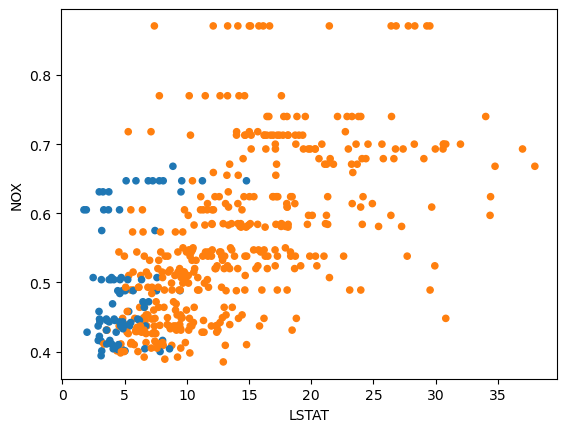

In [26]:
# Color the points by the value of CAT.MEDV
housing_df.plot.scatter(x='LSTAT', y='NOX', c=['C0' if c == 1 else 'C1' for c in housing_df.CAT_MEDV])


## Rescaling

In [27]:
# Avoid the use of scientific notation for the Log axis
plt.rcParams['axes.formatter.min_exponent'] = 4


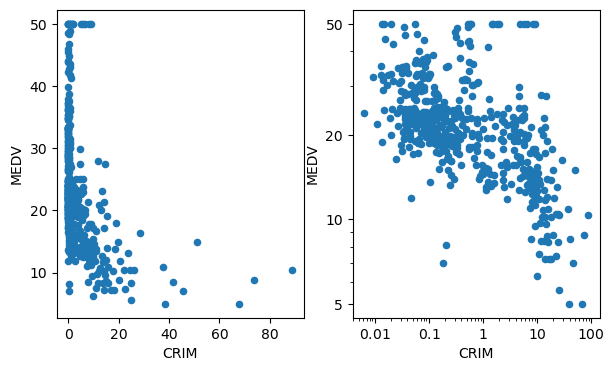

In [28]:
## scatter plot: regular and Log scale
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(7, 4))

# regular scale
housing_df.plot.scatter(x='CRIM', y='MEDV', ax=axes[0])

# Log scale
ax= housing_df.plot.scatter(x='CRIM', y='MEDV', logx=True, logy=True, ax=axes[1])


ax.set_yticks([5, 10, 20, 50])
ax.set_yticklabels([5, 10, 20, 50])
plt.show()


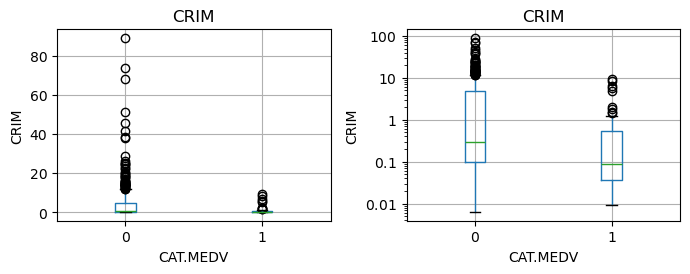

In [29]:
## boxplot: regular and Log scale
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax= housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[0])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')


# Log scale
ax= housing_df.boxplot(column='CRIM', by='CAT_MEDV', ax=axes[1])
ax.set_xlabel('CAT.MEDV'); ax.set_ylabel('CRIM')

ax.set_yscale('log')

#suppress the title
axes[0].get_figure().suptitle('')
plt.tight_layout();
plt.show()


In [30]:
utilities_df = pd.read_csv('Utilities.csv')
print(utilities_df.columns)
print(utilities_df.head())


Index(['Company', 'Fixed_charge', 'RoR', 'Cost', 'Load_factor',
       'Demand_growth', 'Sales', 'Nuclear', 'Fuel_Cost'],
      dtype='object')
        Company  Fixed_charge   RoR  Cost  Load_factor  Demand_growth  Sales  \
0      Arizona           1.06   9.2   151         54.4            1.6   9077   
1       Boston           0.89  10.3   202         57.9            2.2   5088   
2      Central           1.43  15.4   113         53.0            3.4   9212   
3  Commonwealth          1.02  11.2   168         56.0            0.3   6423   
4            NY          1.49   8.8   192         51.2            1.0   3300   

   Nuclear  Fuel_Cost  
0      0.0      0.628  
1     25.3      1.555  
2      0.0      1.058  
3     34.3      0.700  
4     15.6      2.044  


In [31]:
# print(utilities_df.head)
print(utilities_df.shape)


(22, 9)


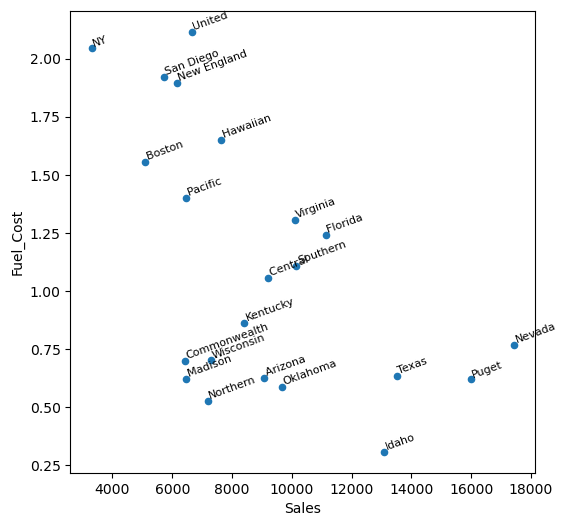

In [32]:
ax= utilities_df.plot.scatter(x='Sales', y='Fuel_Cost', figsize=(6, 6)) 
points= utilities_df[['Sales','Fuel_Cost','Company']]
_ = points.apply(lambda x:
                ax.text(*x, rotation=20, horizontalalignment='left', verticalalignment='bottom', fontsize=8), axis=1)
